In [6]:
# Python
import pandas as pd
from prophet import Prophet

In [39]:
reservaciones = pd.read_excel("../data/reservaciones_time_series.xlsx").sort_values(
    "fecha_ocupacion",
    ascending=True,
)

reservaciones.head()

,fecha_ocupacion,h_num_per,h_num_noc,h_tot_hab,tasa_ocupacion
0,2019-02-13,1231,1498.0,604.0,0.437364
1,2019-02-14,1559,2969.5,730.0,0.528602
2,2019-02-15,1786,3245.0,798.0,0.577842
3,2019-02-16,1905,3706.5,855.0,0.619117
4,2019-02-17,1564,3651.0,692.0,0.501086


# Transform into ds and y

In [11]:
# Example: Load data

df = reservaciones[['fecha_ocupacion','tasa_ocupacion']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df['cap'] = 1.0  # upper bound
df['floor'] = 0.0  # optional lower bound (default is 0)
df.head()

,ds,y,cap,floor


# 2. Split into train/test sets

In [57]:
# For example, use 80% for training, 20% for testing
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [58]:
len(train), len(test)

(558, 140)

In [70]:
mexican_holidays = pd.DataFrame({
    'holiday': [
        'New Year\'s Day', 'Constitution Day', 'Benito Juárez Day',
        'Labor Day', 'Independence Day', 'Revolution Day',
        'Christmas Day1', 'ChristmasDay2', 'ChristmasDay3', 'Christmas Day4', 'ChristmasDay5', 'ChristmasDay6',
        'Christmas Day7', 'ChristmasDay8', 'ChristmasDay9', 'Christmas Day10', 'ChristmasDay11',
          'Day of the Dead', 'Holy Thursday', 'Good Friday'
    ],
    'ds': pd.to_datetime([
        '2024-01-01',  # Año Nuevo
        '2024-02-05',  # Día de la Constitución (first Monday of Feb)
        '2024-03-18',  # Natalicio de Benito Juárez (observed)
        '2024-05-01',  # Día del Trabajo
        '2024-09-16',  # Día de la Independencia
        '2024-11-18',  # Día de la Revolución (observed)
        '2024-12-21',  # Navidad
        '2024-12-22',  # Navidad
        '2024-12-23',  # Navidad
        '2024-12-24',  # Navidad
        '2024-12-25',  # Navidad
        '2024-12-26',  # Navidad
        '2024-12-27',  # Navidad
        '2024-12-28',  # Navidad
        '2024-12-29',  # Navidad
        '2024-12-30',  # Navidad
        '2024-12-31',  # Navidad
        '2024-11-02',  # Día de Muertos
        '2024-03-28',  # Jueves Santo
        '2024-03-29',  # Viernes Santo
    ]),
    'lower_window': -2,
    'upper_window': 2
})

In [71]:
model = Prophet(growth='logistic',holidays=mexican_holidays)
model.fit(train)

17:27:00 - cmdstanpy - INFO - Chain [1] start processing
17:27:00 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
future = test[['ds']]  # Use the actual dates from your test set
future['cap'] = 1.0
future['floor'] = 0.0
forecast = model.predict(future)

C:\Users\angel\AppData\Local\Temp\ipykernel_15744\536825304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['cap'] = 1.0
C:\Users\angel\AppData\Local\Temp\ipykernel_15744\536825304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['floor'] = 0.0


In [73]:
from sklearn.metrics import mean_squared_error

# Compare predicted 'yhat' to actual 'y'
y_true = test['y'].values
y_pred = forecast['yhat'].values

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.008773286082187411


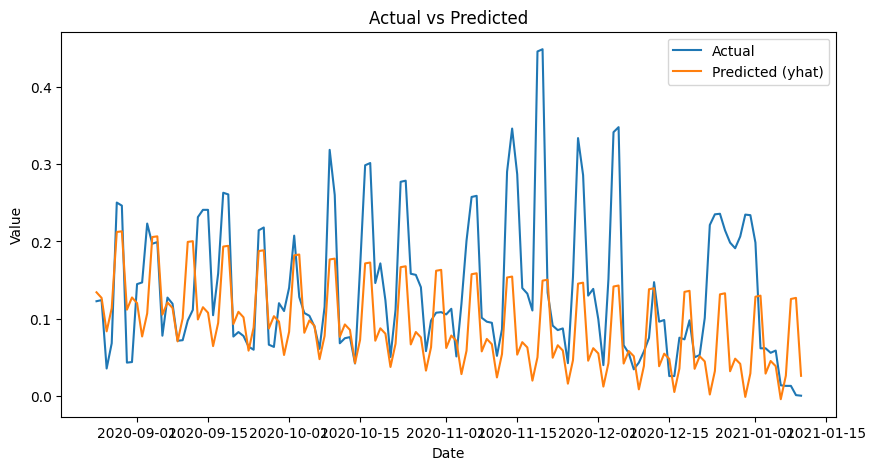

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test['ds'], y_true, label='Actual')
plt.plot(test['ds'], y_pred, label='Predicted (yhat)')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

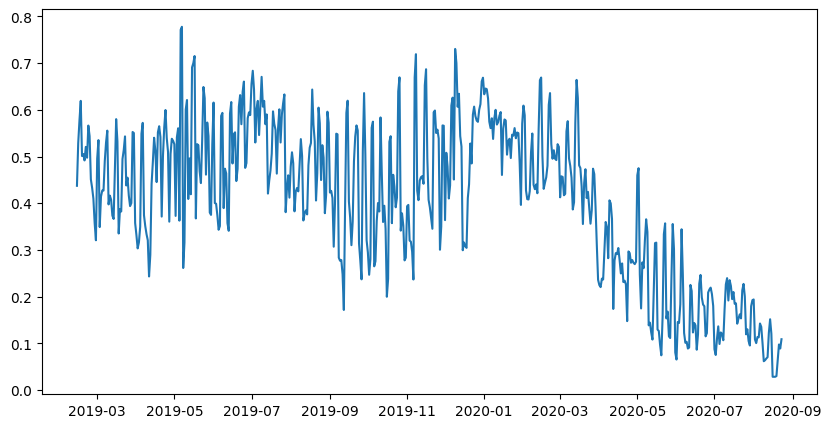

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train['ds'], train['y'], label='Actual')


In [48]:
# Show the top 10 maximum ['ds'] dates
test.sort_values(by='y', ascending=False).head(10)

,ds,y,cap,floor
646,2020-11-20,0.448226,1.0,0.0
645,2020-11-19,0.445329,1.0,0.0
661,2020-12-05,0.347574,1.0,0.0
640,2020-11-14,0.345764,1.0,0.0
660,2020-12-04,0.341057,1.0,0.0
653,2020-11-27,0.333454,1.0,0.0
604,2020-10-09,0.318248,1.0,0.0
612,2020-10-17,0.301231,1.0,0.0
611,2020-10-16,0.298335,1.0,0.0
639,2020-11-13,0.290007,1.0,0.0


In [32]:
future = df[['ds']]  # Use the actual dates from your test set
future['cap'] = 1.0
future['floor'] = 0.0
forecast = model.predict(future)

C:\Users\angel\AppData\Local\Temp\ipykernel_15744\1891271232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['cap'] = 1.0
C:\Users\angel\AppData\Local\Temp\ipykernel_15744\1891271232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['floor'] = 0.0


In [33]:
from sklearn.metrics import mean_squared_error

# Compare predicted 'yhat' to actual 'y'
y_true = df['y'].values
y_pred = forecast['yhat'].values

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.009416238660561387


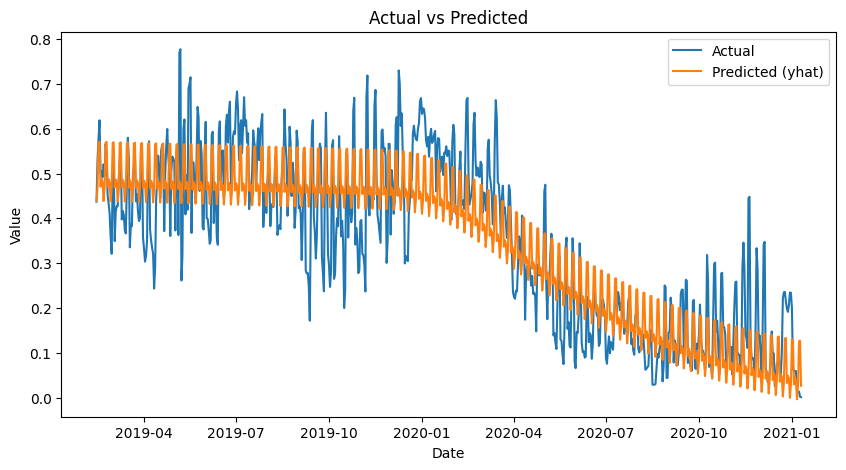

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['ds'], y_true, label='Actual')
plt.plot(df['ds'], y_pred, label='Predicted (yhat)')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

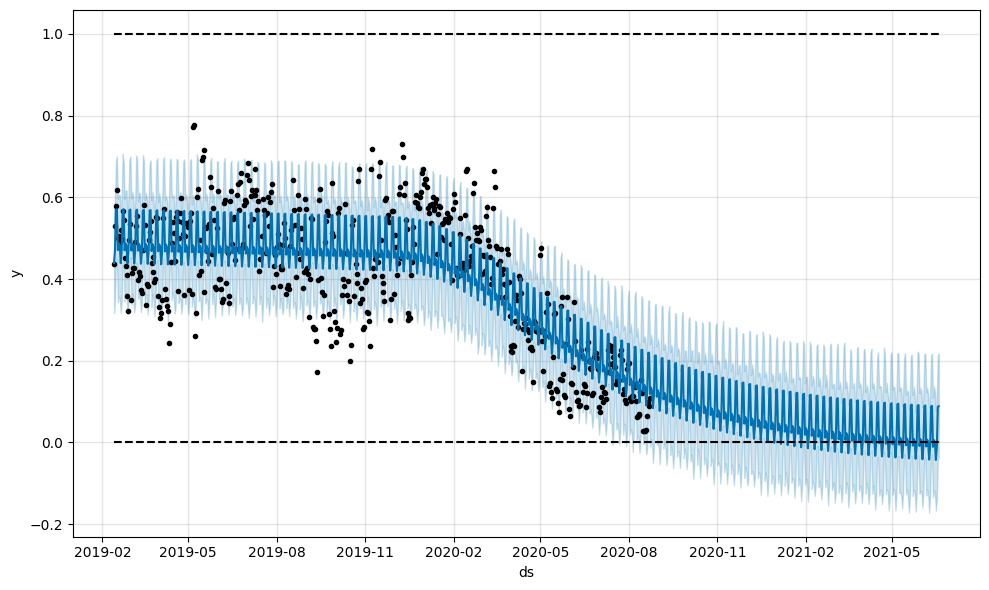

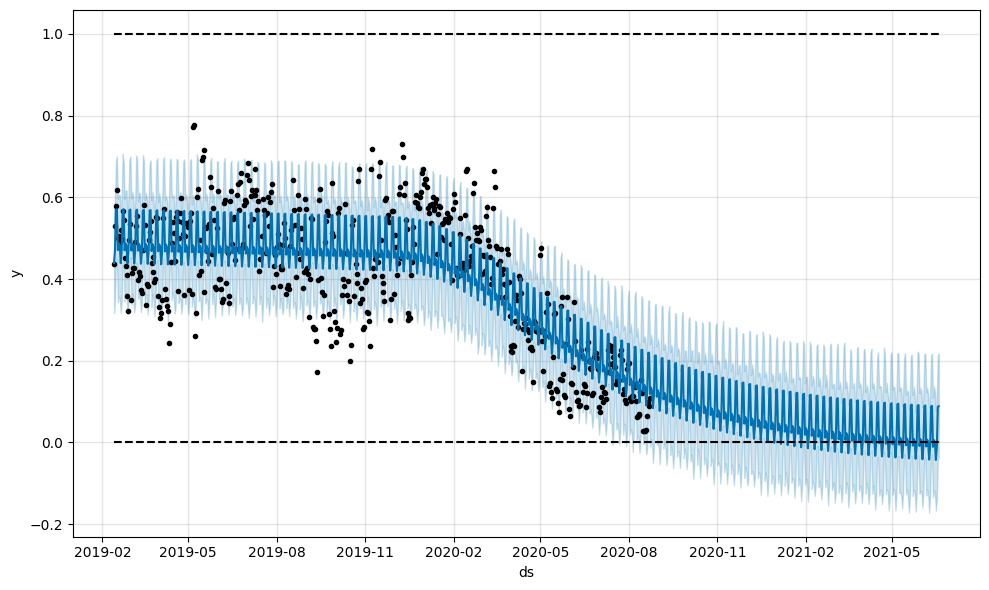

In [37]:
future = model.make_future_dataframe(periods=300)  # e.g., forecast 30 future time steps
future['cap'] = 1.0
future['floor'] = 0.0
forecast = model.predict(future)
model.plot(forecast)

# Ocupaciones

In [2]:
ocupaciones = pd.read_excel("../data/ocupaciones_time_series.xlsx").sort_values(
    "Fecha_hoy",
    ascending=True,
)
ocupaciones.head()

,Fecha_hoy,ing_hab,cto_noc,ADR,num_men,num_adu,TREVPEC
0,2020-11-01,927648.034522,868,477394.231715,396,1734,471826.448439
1,2020-11-02,868258.479988,802,425539.047647,460,1616,425609.064185
2,2020-11-03,820402.234539,760,385132.296256,400,1536,376829.251489
3,2020-11-04,635985.269950,574,357115.104148,200,1114,352913.936147
4,2020-11-05,918465.560104,816,477790.026518,256,1646,453186.729292


# Select only a timeframe

In [41]:
# Select only fecha_ocupacion from feb 2021 till dic 2022
ocupaciones=ocupaciones[(ocupaciones["Fecha_hoy"] >= "2021-02-01") & (ocupaciones["Fecha_hoy"] <= "2022-12-31")]
ocupaciones

,Fecha_hoy,ID_empresa,ing_hab,cto_noc,ADR,num_men,num_adu,TREVPEC
552,2021-02-01,1,1.911908e+05,182.0,1.388267e+05,80.0,384.0,1.375393e+05
553,2021-02-01,2,4.556149e+05,314.0,3.224311e+05,188.0,648.0,3.106684e+05
554,2021-02-01,3,1.023479e+04,10.0,1.023479e+04,2.0,20.0,9.753600e+03
555,2021-02-01,4,NaN,NaN,NaN,NaN,NaN,NaN
556,2021-02-01,5,2.836764e+03,22.0,2.559260e+03,0.0,36.0,2.739070e+03
...,...,...,...,...,...,...,...,...
4741,2022-12-31,2,2.752637e+06,920.0,1.011594e+06,764.0,1788.0,1.049922e+06
4742,2022-12-31,3,7.806776e+05,140.0,3.565132e+05,170.0,286.0,3.566653e+05
4743,2022-12-31,4,6.547658e+02,2.0,6.547658e+02,4.0,4.0,6.235300e+02
4744,2022-12-31,5,1.378321e+04,40.0,1.571963e+03,4.0,80.0,1.497108e+03


In [42]:
# Example: Load data

df = ocupaciones[['Fecha_hoy','cto_noc']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

C:\Users\angel\AppData\Local\Temp\ipykernel_5600\1272545242.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
552,2021-02-01,182.0
553,2021-02-01,314.0
554,2021-02-01,10.0
555,2021-02-01,NaN
556,2021-02-01,22.0


In [43]:
# For example, use 80% for training, 20% for testing
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]
len(train), len(test)

(3355, 839)

In [44]:
model = Prophet()
model.fit(train)

16:44:24 - cmdstanpy - INFO - Chain [1] start processing
16:44:24 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = test[['ds']]  # Use the actual dates from your test set
forecast = model.predict(future)

In [46]:
from sklearn.metrics import mean_squared_error

# Compare predicted 'yhat' to actual 'y'
y_true = test['y'].values
y_pred = forecast['yhat'].values

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 223237.55706285292


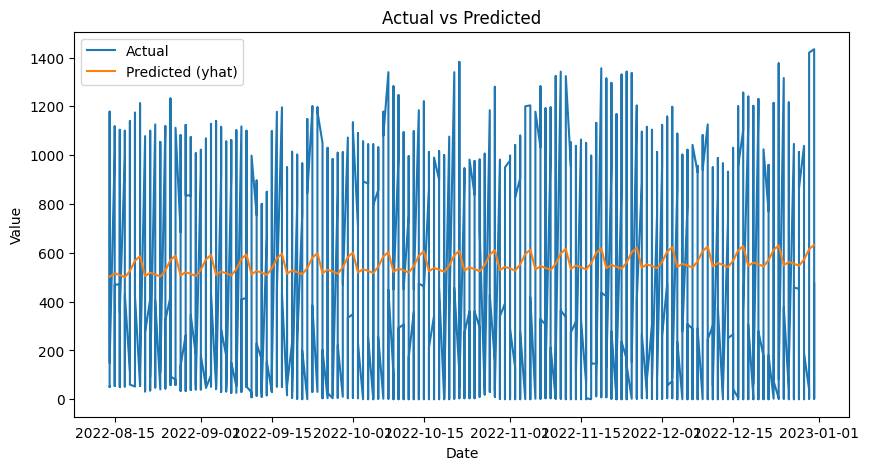

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test['ds'], y_true, label='Actual')
plt.plot(test['ds'], y_pred, label='Predicted (yhat)')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

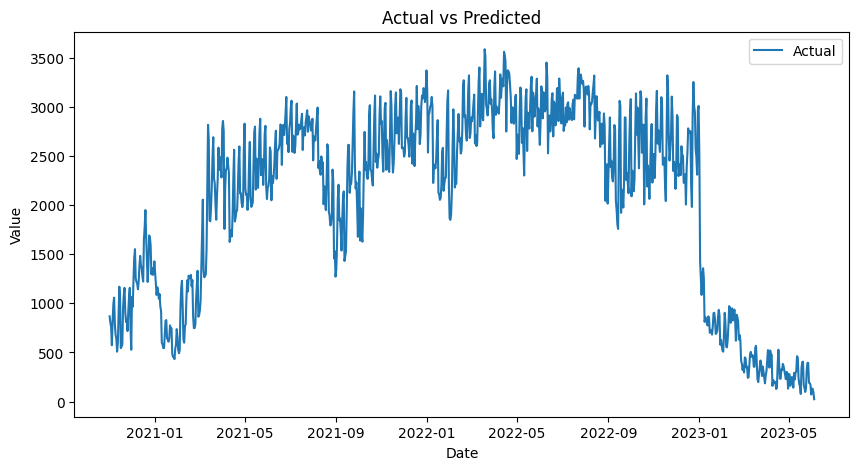

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'], label='Actual')
#plt.plot(train['ds'], y_pred, label='Predicted (yhat)')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Ocupaciones por hotel

In [2]:
ocupaciones = pd.read_excel("../data/ocupaciones_time_series_by_empresa.xlsx").sort_values(
    "Fecha_hoy",
    ascending=True,
)
ocupaciones.head()

,Fecha_hoy,ID_empresa,ing_hab,cto_noc,ADR,num_men,num_adu,TREVPEC
0,2020-11-01,1,900239.512110,846.0,449985.709303,388.0,1692.0,444233.508439
1,2020-11-01,2,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-01,3,27408.522411,22.0,27408.522411,8.0,42.0,27592.940000
3,2020-11-01,4,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-01,5,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ocupaciones.groupby(['ID_empresa'])['cto_noc'].max().reset_index()

,ID_empresa,cto_noc
0,1,1434.0
1,2,1342.0
2,3,522.0
3,4,66.0
4,5,186.0
5,6,530.0


In [3]:
ctos_por_hotel=ocupaciones.groupby(['ID_empresa','Fecha_hoy'])['cto_noc'].sum().reset_index()
ctos_por_hotel.head()

,ID_empresa,Fecha_hoy,cto_noc
0,1,2020-11-01,846.0
1,1,2020-11-02,712.0
2,1,2020-11-03,662.0
3,1,2020-11-04,470.0
4,1,2020-11-05,678.0


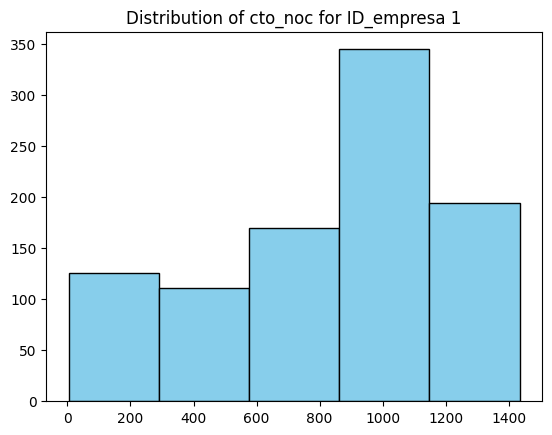

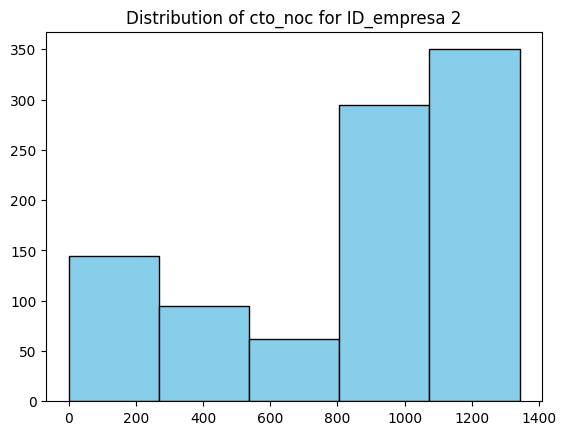

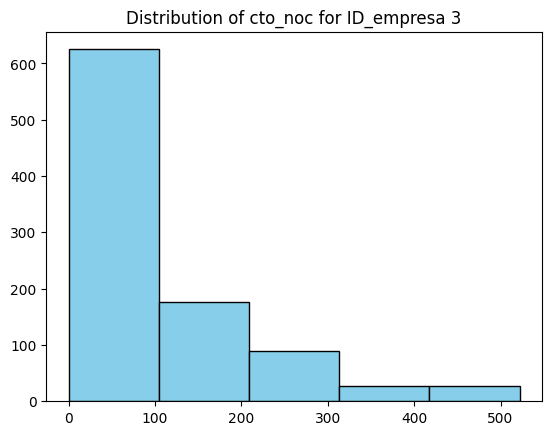

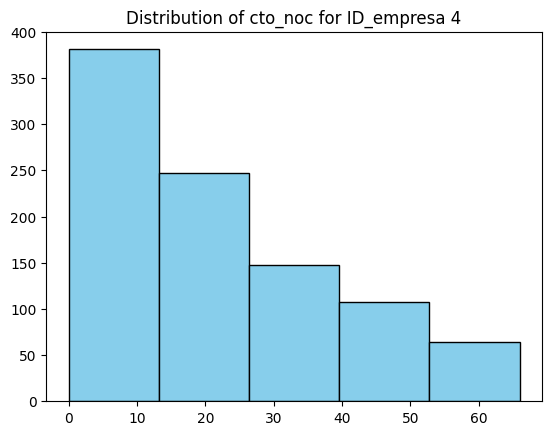

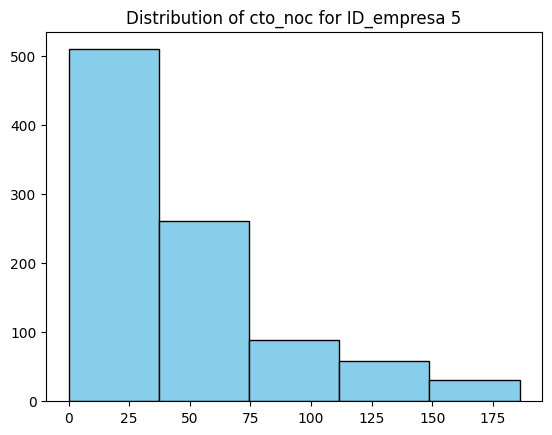

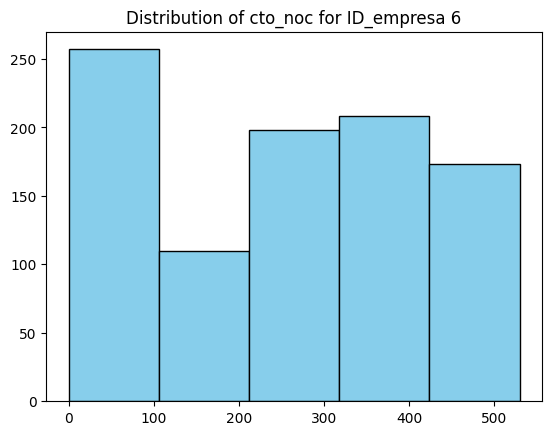

In [4]:
# Generate a plot of cto_noc distribution by ID_empresa
import matplotlib.pyplot as plt


for i in range(len(ctos_por_hotel['ID_empresa'].unique())):
        empresa = ctos_por_hotel[ctos_por_hotel['ID_empresa'] == i+1]
        plt.hist(empresa["cto_noc"], bins=5, color='skyblue', edgecolor='black')
        plt.title(f"Distribution of cto_noc for ID_empresa {i+1}")
        plt.show()
   

    # Show plot


In [35]:
ctos_por_hotel

,ID_empresa,Fecha_hoy,cto_noc
0,1,2020-11-01,846.0
1,1,2020-11-02,712.0
2,1,2020-11-03,662.0
3,1,2020-11-04,470.0
4,1,2020-11-05,678.0
...,...,...,...
5671,6,2023-05-31,0.0
5672,6,2023-06-01,0.0
5673,6,2023-06-02,0.0
5674,6,2023-06-03,6.0


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go


# Plot the time series


# Create an interactive figure
fig = go.Figure()

# Add each time series as a trace


for i in range(len(ctos_por_hotel['ID_empresa'].unique())):

    empresa = ctos_por_hotel[ctos_por_hotel['ID_empresa'] == i+1]
    fig.add_trace(go.Scatter(x=empresa['Fecha_hoy'], y=empresa['cto_noc'], mode='lines', name=f'ID_empresa {i+1}'))

# Customize layout
fig.update_layout(
    title="Interactive Time Series Plot",
    xaxis_title="Date",
    yaxis_title="Value",
    hovermode="x unified",
)

# Show the plot
fig.show()


In [13]:
# Count the number of missing values in each column
ocupaciones.isnull().sum()

Fecha_hoy       0
ID_empresa      0
ing_hab       365
cto_noc       365
ADR           365
num_men       365
num_adu       365
TREVPEC       365
dtype: int64